# #DuBoisChallenge2024 Challenge 01

This notebook shows you how to load the shapefile of challenge 01 using GeoPandas and visualise the data using Matplotlib. It consists of three steps:

1. Loading the data
2. Test visualisations
3. Final visualisation

But first, we load the two required packages

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

## 1. Loading data

Using GeoPandas, we can easily create a dataframe that holds the data for 1870 and 1880, and the shapes for the counties.

In [3]:
gdf = gpd.read_file('2024/challenge01/georgia-1880-county-shapefile.zip')
gdf.head(3)

,DECADE,NHGISNAM,NHGISST,NHGISCTY,ICPSRST,ICPSRCTY,ICPSRNAM,STATENAM,ICPSRSTI,ICPSRCTYI,ICPSRFIP,GISJOIN,GISJOIN2,data1870 (,data1880_P,geometry
0,1880,Appling,130,0010,44,10,APPLING,Georgia,44,10,13001.0,G1300010,1300010,> 1000,1000 - 2500,"POLYGON ((1310135.815 -537927.898, 1310122.449..."
1,1880,Baker,130,0070,44,70,BAKER,Georgia,44,70,13007.0,G1300070,1300070,2500 - 5000,5000 - 10000,"POLYGON ((1090472.791 -651587.102, 1090472.696..."
2,1880,Baldwin,130,0090,44,90,BALDWIN,Georgia,44,90,13009.0,G1300090,1300090,5000 - 10000,5000 - 10000,"POLYGON ((1197510.422 -412783.587, 1197504.152..."


We then need to map the values 1870 and 1880 data to colours. As a preperation, the cell below sets up two dictionaries. One for the colours, linking names to colour values. This makes it easier to reuse it in later challenges. The other dict maps the values to the colours.

In [4]:
dubois_colors = {
    'black': '#000000',
    'brown': '#654321',
    'tan': '#d2b48c',
    'gold': '#ffd700',
    'pink': '#ffc0cb',
    'crimson': '#dc143c',
    'green': '#00aa00',
    'blue': '#4682b4',
    'purple': '#7e6583',
    'bg': '#FAF0E6',
}
color_map = {
    '20000 - 30000': dubois_colors['purple'],
    '15000 - 20000': dubois_colors['brown'],
    '10000 - 15000': dubois_colors['tan'],
    '5000 - 10000': dubois_colors['crimson'],
    '2500 - 5000': dubois_colors['pink'],
    '1000 - 2500': dubois_colors['gold'],
    '> 1000': dubois_colors['green'],
}

You can then use these two dictionaries to add two new columns to the dataframe, one with the 1870 colours and one with the 1880 colours. Making a colour column makes it easy to use when visualising the data later on. For some counties, there are no data for 1870, and we default to `white`. 

*Note that the value names of the shape file are quite odd: `data1870 (` and `data1880_P`.*

In [5]:
def map_colors(value):
    if value not in color_map:
        return 'white'
    
    return color_map[value]

gdf['colors 1870'] = gdf.apply(lambda row: map_colors(row['data1870 (']), axis=1)
gdf['colors 1880'] = gdf.apply(lambda row: map_colors(row['data1880_P']), axis=1)

# preview colour data by state
gdf[['NHGISNAM', 'colors 1870', 'colors 1880']].head(3)

,NHGISNAM,colors 1870,colors 1880
0,Appling,#00aa00,#ffd700
1,Baker,#ffc0cb,#dc143c
2,Baldwin,#dc143c,#dc143c


## 2: Test visualisations

We can now test some plots of the data. Lets try the general shape of Georgia state first:

<AxesSubplot:>

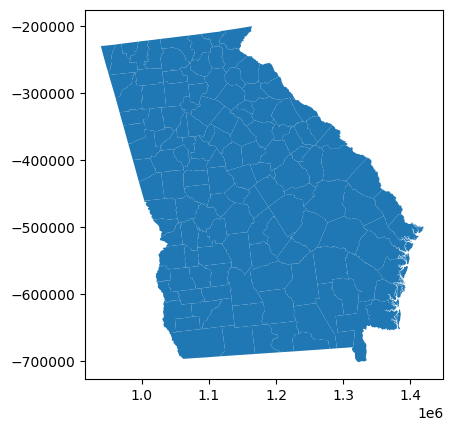

In [12]:
gdf.plot()

Nice. Now let's add the right colours to each county:

<AxesSubplot:>

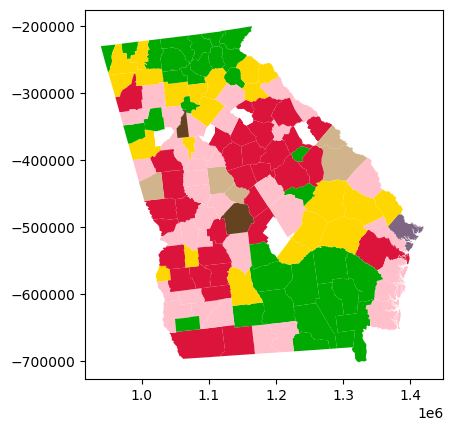

In [13]:
gdf.plot(color=gdf['colors 1870'])

The original shows a thin black line at the borders. We can easily add that with a few parameters:

<AxesSubplot:>

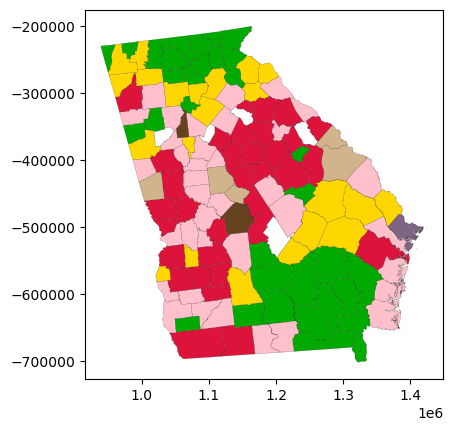

In [14]:
gdf.plot(color=gdf['colors 1870'], edgecolor='black', lw=.1)

And just to be sure, we test the 1880 data as well:

<AxesSubplot:>

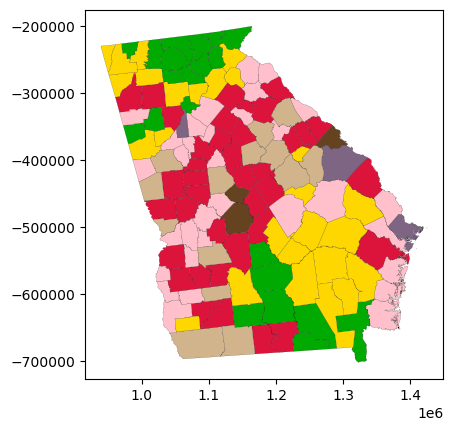

In [15]:
gdf.plot(color=gdf['colors 1880'], edgecolor='black', lw=.1)

## 3: Final visualsation

Okay, let's add everything together. First, you need to setup a range map. This allows us to map the values from the dataframe to the related legend labels as used in the original.

In [16]:
range_map = {
    '20000 - 30000': 'between 20,000 and 30,000',
    '15000 - 20000': '15,000 to 20,000',
    '10000 - 15000': '10,000 to 15,000',
    '5000 - 10000': '5,000 to 10,000',
    '2500 - 5000': '2,500 to 5,000',
    '1000 - 2500': '1,000 to 2,500',
    '> 1000': 'under 1,000',
}

It then comes down to using Matplotlib creatively. The setup uses a 2x2 grid of subplots. Using  `gridspec_kw`, we can play around with margins, making the plots overlap. 

Technically, the final image consists of two maps and two scatter plots as legends. If you disable line 41 and 42, you enbale the view of the axes. This makes it easyer to see how the plot works. 

Text(0.5, 0.9, 'NEGRO POPULATION OF GEORGIA BY COUNTIES')

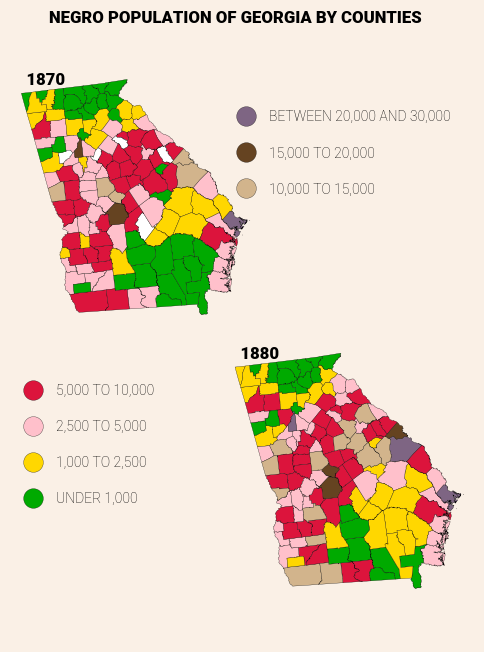

In [17]:
fig, (axs) = plt.subplots(
    2, 
    2, 
    figsize=(6,8),        
    gridspec_kw={
        'wspace': -0.15,
        'hspace': -.2
    }, 
    facecolor=dubois_colors['bg']
)

# I use the Robot font
rob_font_heavy = {'fontname':'Roboto', 'fontweight': 'black',}
rob_font_light = {'fontname':'Roboto', 'fontweight': 'light',}

# to use the 4 subplots axes
axes = axs.flat

# plot maps in ax 0 and 3
gdf.plot(ax=axes[0], color=gdf['colors 1870'], edgecolor='black', lw=.2)
gdf.plot(ax=axes[3], color=gdf['colors 1880'], edgecolor='black', lw=.2)
axes[0].set_title('    1870', y=.9, loc='left', **rob_font_heavy)
axes[3].set_title('    1880', y=.9, loc='left', **rob_font_heavy)

# plot legends in ax 1 and 2
legend_ylim = [-8, 1.5]
axes[1].set_ylim(legend_ylim)
axes[1].set_xlim([-.5, 5])
axes[2].set_ylim(legend_ylim)
axes[2].set_xlim([-.5, 5])

for index, color in enumerate(color_map):
    if index <= 2:
        axes[1].scatter(0, -(index+1), facecolor=color_map[color], edgecolor='black', s=200, lw=.2)
        axes[1].annotate(range_map[color].upper(), (0.5, -(index+1)-.15), **rob_font_light)
    else:
        axes[2].scatter(0, -(index+1-3), facecolor=color_map[color], edgecolor='black', s=200, lw=.2)
        axes[2].annotate(range_map[color].upper(), (0.5, -(index+1-3)-.15), **rob_font_light)

# disable all axes
for ax in axes:
    ax.axis('off')

# set title
fig.suptitle('negro population of georgia by counties'.upper(), y=.9, **rob_font_heavy)